<a href="https://colab.research.google.com/github/rishi12jn/Predictive-analytics-Lab/blob/main/LAB5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Load dataset
file_path = '/content/drive/MyDrive/bodyPerformance.csv'

try:
    # Attempt to load the dataset
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("File not found. Please check the file path.")
    df = None  # To avoid errors if the dataset is not loaded
except pd.errors.EmptyDataError:
    print("No data found in the file.")
    df = None
except pd.errors.ParserError:
    print("Error while parsing the file. Please check its format.")
    df = None

if df is not None:
    # Check the data types of the columns
    print("Column Data Types:\n", df.dtypes)

    # Example: Convert categorical 'Gender' column to numeric
    if 'Gender' in df.columns:
        df['Gender'] = df['Gender'].map({'M': 1, 'F': 0})  # Adjust mapping if needed
        print("'Gender' column converted to numeric.")

    # Alternatively, drop non-numeric columns to focus on numeric data
    df_numeric = df.select_dtypes(include=[float, int])

    # Calculate the correlation matrix
    correlation_matrix = df_numeric.corr()

    # Display the correlation matrix
    print("Correlation Matrix:\n", correlation_matrix)
else:
    print("No operations performed due to dataset loading issues.")


Dataset loaded successfully.
Column Data Types:
 age                        float64
gender                      object
height_cm                  float64
weight_kg                  float64
body fat_%                 float64
diastolic                  float64
systolic                   float64
gripForce                  float64
sit and bend forward_cm    float64
sit-ups counts             float64
broad jump_cm              float64
class                       object
dtype: object
Correlation Matrix:
                               age  height_cm  weight_kg  body fat_%  \
age                      1.000000  -0.293980  -0.099966    0.242302   
height_cm               -0.293980   1.000000   0.734909   -0.515440   
weight_kg               -0.099966   0.734909   1.000000   -0.084065   
body fat_%               0.242302  -0.515440  -0.084065    1.000000   
diastolic                0.158508   0.145933   0.262317    0.048059   
systolic                 0.211167   0.210186   0.338943   -0.030376   

Dataset loaded successfully.


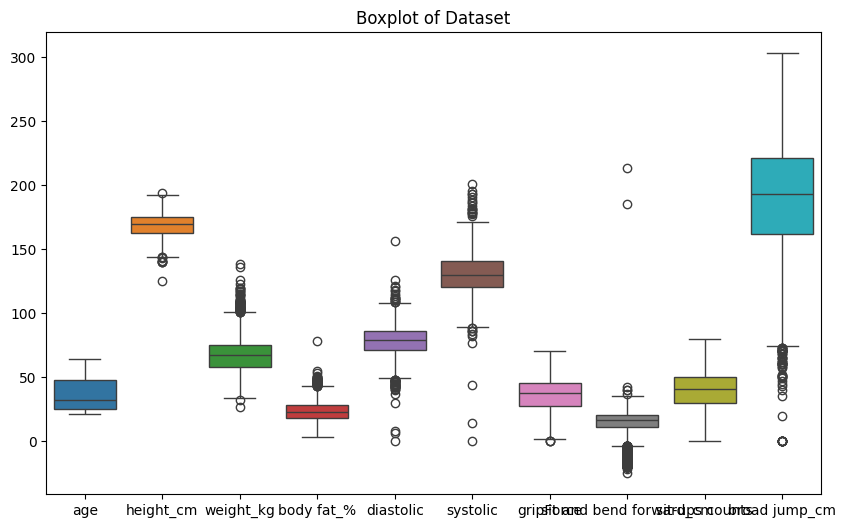

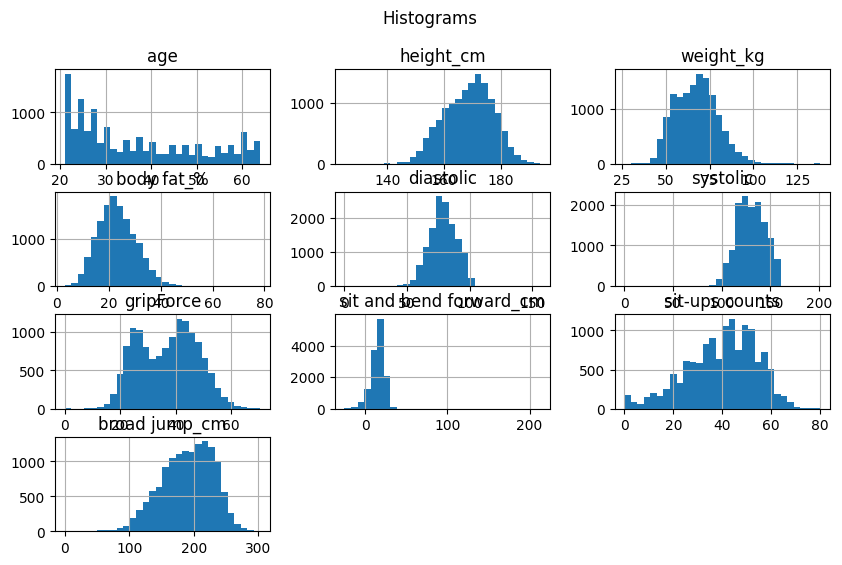

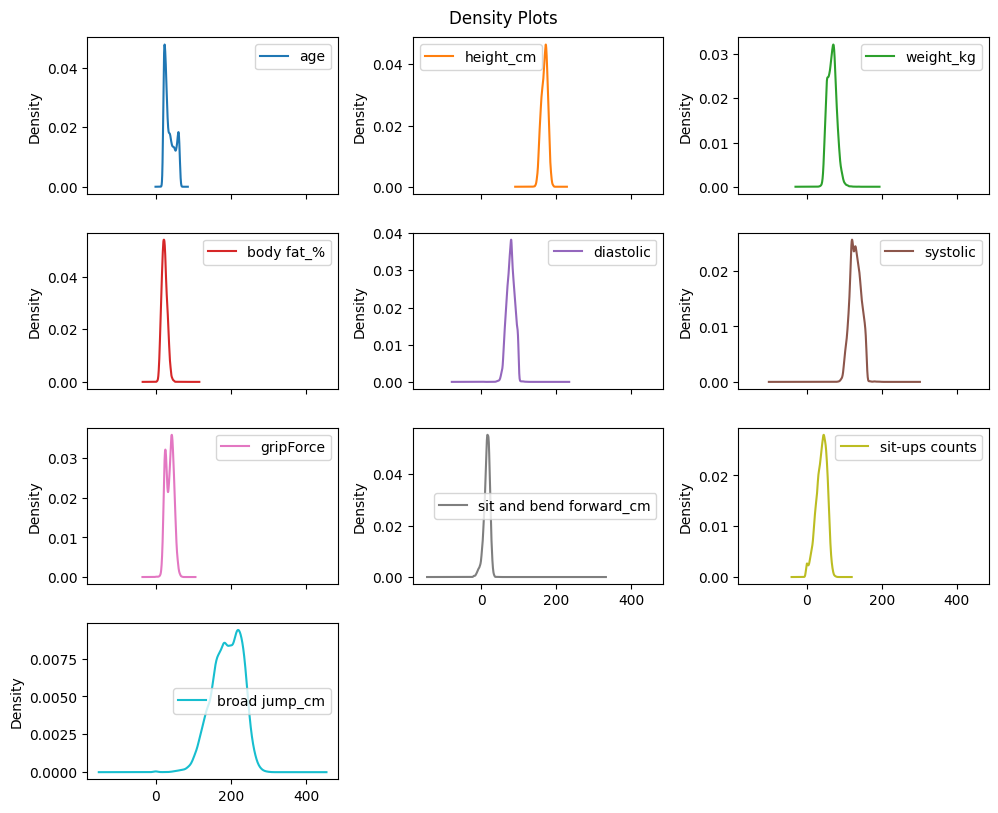

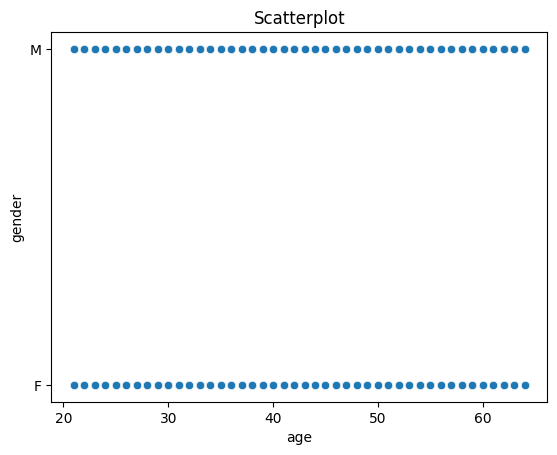

Column 'categorical_column' does not exist in the DataFrame.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = '/content/drive/MyDrive/bodyPerformance.csv'
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("File not found. Please check the file path.")
    df = None
except pd.errors.EmptyDataError:
    print("No data found in the file.")
    df = None
except pd.errors.ParserError:
    print("Error while parsing the file. Please check its format.")
    df = None

if df is not None:
    # Boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df)
    plt.title("Boxplot of Dataset")
    plt.show()

    # Histograms
    df.hist(figsize=(10, 6), bins=30)
    plt.suptitle("Histograms")
    plt.show()

    # Density Plots
    num_cols = len(df.columns)  # Get the number of columns
    # Calculate the layout based on the number of columns
    layout_size = (num_cols // 3 + 1, 3) if num_cols > 3 else (1, num_cols)
    # Create density plots
    df.plot(kind='density', subplots=True, layout=layout_size, figsize=(10, 10))
    plt.suptitle("Density Plots")
    plt.tight_layout()  # Adjust layout to avoid overlap
    plt.show()

    # Scatterplot (for the first two columns)
    if len(df.columns) >= 2:  # Check if there are at least 2 columns
        sns.scatterplot(x=df.columns[0], y=df.columns[1], data=df)
        plt.title("Scatterplot")
        plt.show()
    else:
        print("Not enough columns for a scatterplot.")

    # Bar chart (for categorical data)
    categorical_column = 'categorical_column'  # Replace with the actual column name
    if categorical_column in df.columns:
        df[categorical_column].value_counts().plot(kind='bar', figsize=(10, 6))
        plt.title(f"Bar Chart of {categorical_column}")
        plt.show()
    else:
        print(f"Column '{categorical_column}' does not exist in the DataFrame.")
else:
    print("No operations performed due to dataset loading issues.")
